27     719
26     418
28     247
38     153
24     108
20     103
23     100
22      37
332      9
34       6
35       6
30       4
36       3
21       2
29       2
331      1
Name: hatchisland, dtype: int64

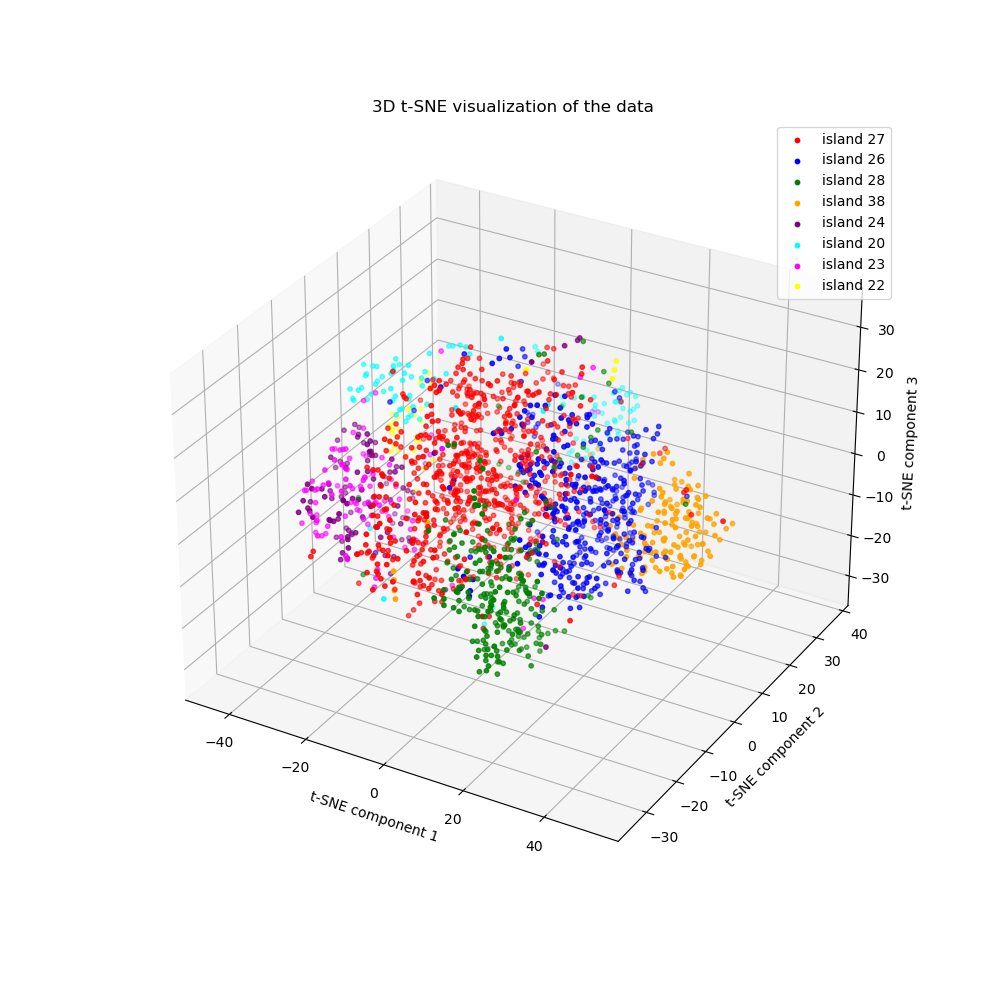

In [2]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib widget

#Read SNP data
df = pd.read_feather("data/processed/massBV.feather")

island_count = df.hatchisland.value_counts()    
display(island_count)

#Remove islands with less than 10 (or some other number) observations
def filter_islands(df, island_count, threshold):
    islands = island_count[island_count > threshold].index
    return df[df.hatchisland.isin(islands)]

df = filter_islands(df, island_count, 10)

#Set X to be SNP data
X = np.nan_to_num(df.iloc[:, 9:].values)

# Center and scale each feature
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

#Run t-SNE for two dimensions. Set perplexity
tsne = TSNE(n_components=3, random_state=42, perplexity=50, metric='cosine')
X_tsne = tsne.fit_transform(X)


#Plot t-SNE
#All islands to be included
classes = island_count[island_count > 10].index
n_islands = len(classes)
#Colors for each island
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow']



#Plot t-SNE projections of individuals from one island at the time. 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_islands):
    # indexes for individuals in island classes[i]
    indexes = (df['hatchisland'] == classes[i])
    ax.scatter(X_tsne[indexes, 0], X_tsne[indexes, 1], X_tsne[indexes, 2], c=colors[i], label=f'island {classes[i]}', s=10)

ax.set_xlabel('t-SNE component 1')
ax.set_ylabel('t-SNE component 2')
ax.set_zlabel('t-SNE component 3')
ax.set_title('3D t-SNE visualization of the data')
ax.legend()
plt.show()


In [34]:
mass_pheno = pd.read_feather("data/processed/massBV.feather", columns=['mean_pheno', 'hatchisland','ringnr'])   
tarsus_pheno = pd.read_feather("data/processed/tarsusBV.feather", columns=['mean_pheno', 'hatchisland','ringnr'])  
wing_pheno = pd.read_feather("data/processed/wingBV.feather", columns=['mean_pheno', 'hatchisland','ringnr']) 

In [38]:
tarsus_pheno

,mean_pheno,hatchisland,ringnr
0,19.866667,28,8118424
1,19.320000,28,8118425
2,19.608333,28,8118426
3,19.680000,28,8118429
4,18.820000,28,8118430
...,...,...,...
1910,18.730000,26,8N87368
1911,20.030000,26,8N87369
1912,19.490000,26,8N87371
1913,19.270000,26,8N87372


In [51]:
#merge mass_pheno with tarsus_pheno and wing_pheno on ringnr. Only include the mean_pheno column
pheno = pd.merge(mass_pheno, tarsus_pheno[["ringnr", "mean_pheno"]], on='ringnr', suffixes=('_mass', '_tarsus')).merge(wing_pheno[["ringnr", "mean_pheno"]], on='ringnr')
pheno = pheno[["ringnr", "hatchisland", "mean_pheno_mass", "mean_pheno_tarsus", "mean_pheno"]]


In [56]:
island_count = pheno.hatchisland.value_counts()  

#Remove islands with less than 10 (or some other number) observations
def filter_islands(df, island_count, threshold):
    islands = island_count[island_count > threshold].index
    return df[df.hatchisland.isin(islands)]

pheno = filter_islands(pheno, island_count, 10)

In [59]:
X = np.nan_to_num(pheno.iloc[:, 2:].values)

array([[32.6       , 19.86666667, 81.47      ],
       [30.3       , 19.32      , 76.205     ],
       [33.31666667, 19.60833333, 79.57666667],
       ...,
       [32.5       , 19.49      , 81.31      ],
       [32.8       , 19.27      , 77.63      ],
       [33.2       , 20.76      , 79.31      ]])

In [60]:
# Center and scale each feature
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

In [61]:
#Run t-SNE for two dimensions. Set perplexity
tsne = TSNE(n_components=2, random_state=42, perplexity=30, metric='cosine')
X_tsne = tsne.fit_transform(X)

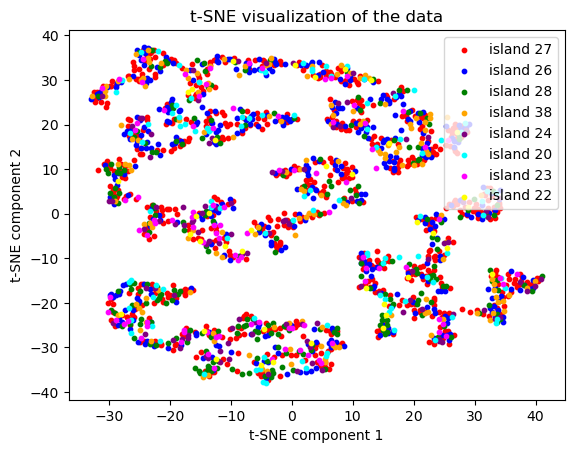

In [62]:
#Plot t-SNE
#All islands to be included
classes = island_count[island_count > 10].index
n_islands = len(classes)
#Colors for each island
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow']



#Plot t-SNE projections of individuals from one island at the time. 
for i in range(n_islands):
    #indexes for individuals in island classes[i]
    indexes = (pheno['hatchisland'] == classes[i])
    plt.scatter(X_tsne[indexes, 0], X_tsne[indexes, 1], c=colors[i], label=f'island {classes[i]}', s=10)

plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE visualization of the data')
plt.legend()
plt.show()